In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

%precision 2
pd.set_option('display.precision', 3)

import ndl, sim
from zt import ztnbinom

In [2]:
ns = [ztnbinom.rvs(3,.6) for i in xrange(10000)]
data = np.zeros((max(ns)))
for i in ns:
    data[i-1] += 1
data

array([  3.26e+03,   2.65e+03,   1.83e+03,   1.05e+03,   6.02e+02,
         3.06e+02,   1.56e+02,   7.80e+01,   4.00e+01,   8.00e+00,
         1.30e+01,   2.00e+00,   2.00e+00,   1.00e+00])

In [3]:
data = pd.DataFrame(data,columns=['Frequency'],index=range(1,len(data)+1))
data['Cues'] = [range(1,i+1) + ['exactly%d'%i] for i in data.index]
data['Number'] = data.index
data

,Frequency,Cues,Number
1,3265,"[1, exactly1]",1
2,2648,"[1, 2, exactly2]",2
3,1832,"[1, 2, 3, exactly3]",3
4,1047,"[1, 2, 3, 4, exactly4]",4
5,602,"[1, 2, 3, 4, 5, exactly5]",5
6,306,"[1, 2, 3, 4, 5, 6, exactly6]",6
7,156,"[1, 2, 3, 4, 5, 6, 7, exactly7]",7
8,78,"[1, 2, 3, 4, 5, 6, 7, 8, exactly8]",8
9,40,"[1, 2, 3, 4, 5, 6, 7, 8, 9, exactly9]",9
10,8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, exactly10]",10


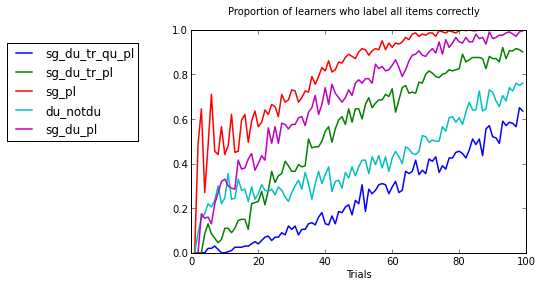

In [4]:
r = sim.experiment(data, P=200, M=100)
sim.all_results(r)

In [5]:
def sampler(p):
    def ztnb():
        return ztnbinom(*p).rvs()
    return ztnb

number_sampler = sampler((3,.6))

In [6]:
del(data['Frequency'])
data

,Cues,Number,Outcomes
1,"[1, exactly1]",1,notdu
2,"[1, 2, exactly2]",2,du
3,"[1, 2, 3, exactly3]",3,notdu
4,"[1, 2, 3, 4, exactly4]",4,notdu
5,"[1, 2, 3, 4, 5, exactly5]",5,notdu
6,"[1, 2, 3, 4, 5, 6, exactly6]",6,notdu
7,"[1, 2, 3, 4, 5, 6, 7, exactly7]",7,notdu
8,"[1, 2, 3, 4, 5, 6, 7, 8, exactly8]",8,notdu
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, exactly9]",9,notdu
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, exactly10]",10,notdu


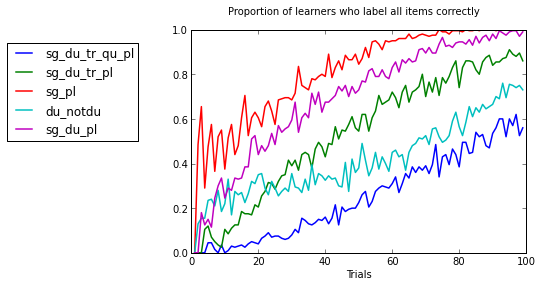

In [7]:
r2 = sim.experiment(data, P=200, M=100, distribution=number_sampler)
sim.all_results(r2)